# Problem Statements:
We are given a dataset of Customers who have churned and who have not churned with Features like CreditScore, Exited, etc. Our task is to:

1. Identify and visualize which factors contribute to customer churn.
2. Build a prediction model that will perform the following:
  * Classify if a customer is going to churn or not
  * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## Some important information:
1. We have to build a supervised model because we have features and labels in our dataset.
2. We will do prediction that whether a customer can churn or not in the coming future, so it is a classification task problem that we are going to solve.

## Performance Metrics:
We have a classification problem so we have to measure the performance of the model using confusion matrix, accuracy score and roc curve.


## Assumptions:
1. We have to build a classification model and not a regression model.

# Procedure that we are going to follow:
1. importing csv file
2. we will do exploratory analysis
3. after eda we will do feature enginerring
4. in the last we will create classification model for prediction of customer churn.

## Data Collection:
* The data is collected from Kaggle:
  * https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/input

In [ ]:
# importing pandas library for analysis
import pandas as pd

In [ ]:
# importing csv file from google drive
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
# top 5 rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset has features --->**[RowNumber, CustomerId, ... , EstimatedSalary]** and labels--->**[Exited]**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The columns has data types integers, float and object. There is no null values as all the columns have 10000 entries.

In [ ]:
# checking statistical description
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(10000, 14)

There are 10000 entries in the dataframe with 14 columns.

<ipython-input-7-c88181af17a8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")


<Axes: >

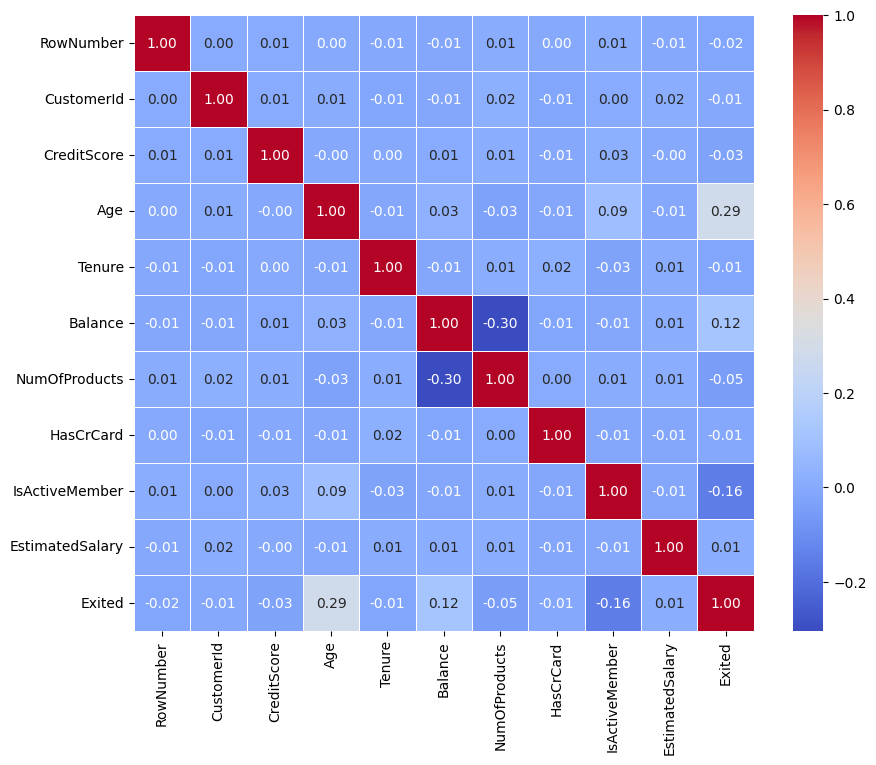

In [ ]:
# importing matplotlib and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))

# ploting heatmap with seaborn library
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")


Observations:
1. Age feature is highly positively correlated to the Exited label. It looks like the customers who are older with respect to age are leaving the bank.
2. NumOfProducts feature is highly negatively correlated to the Balance feature.
3. IsActiveMemeber feature is highly negetivaly correlated to the exited label
4. Balance Feature is positevely correlated to the exited label

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

No duplicate entries in the dataframe

In [ ]:
df.corr()['Exited'].sort_values(ascending=False)

<ipython-input-10-1f143c859366>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited'].sort_values(ascending=False)


Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

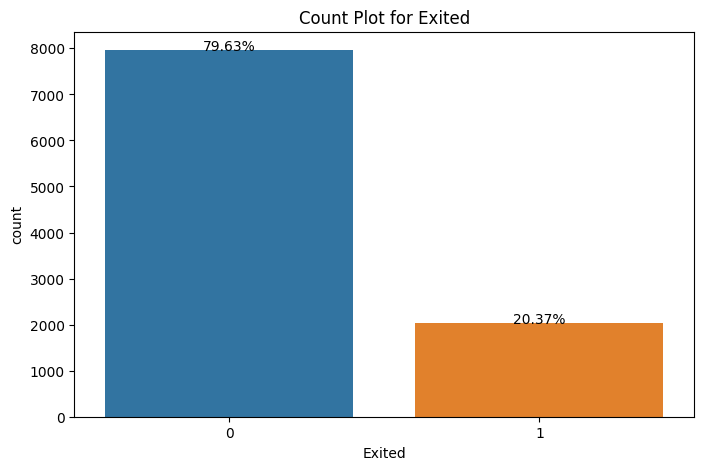

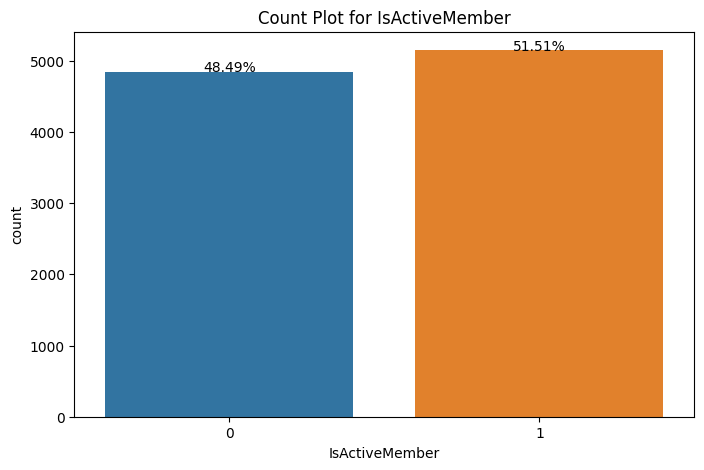

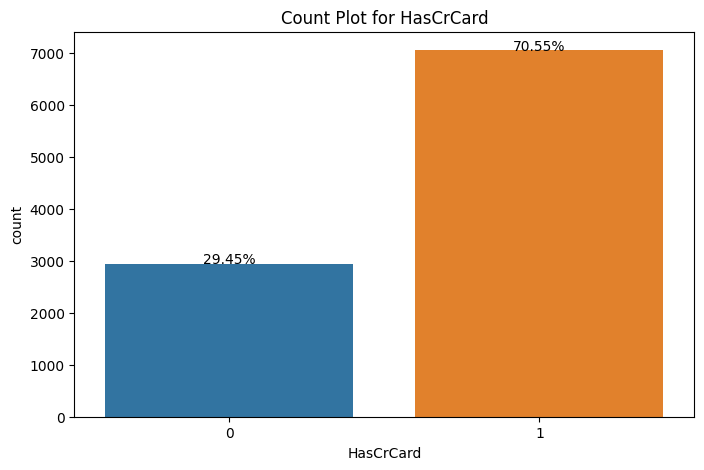

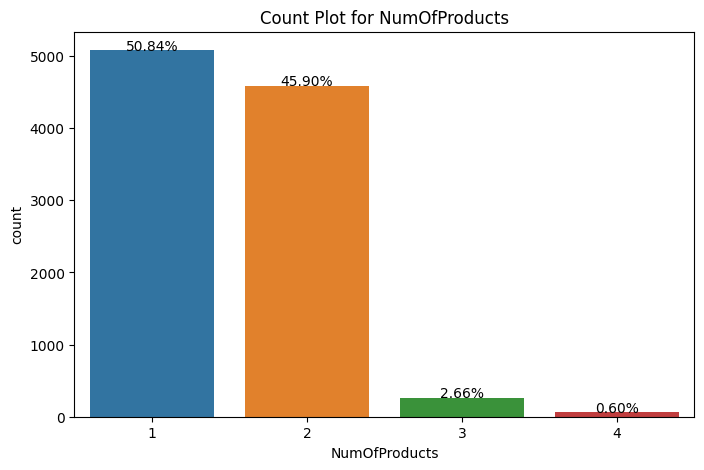

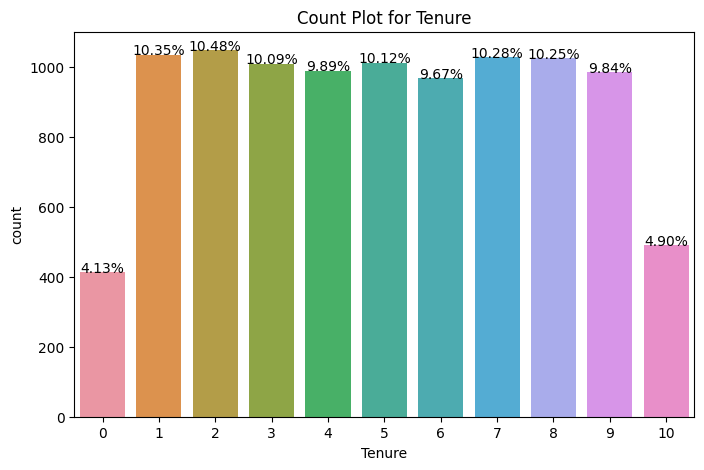

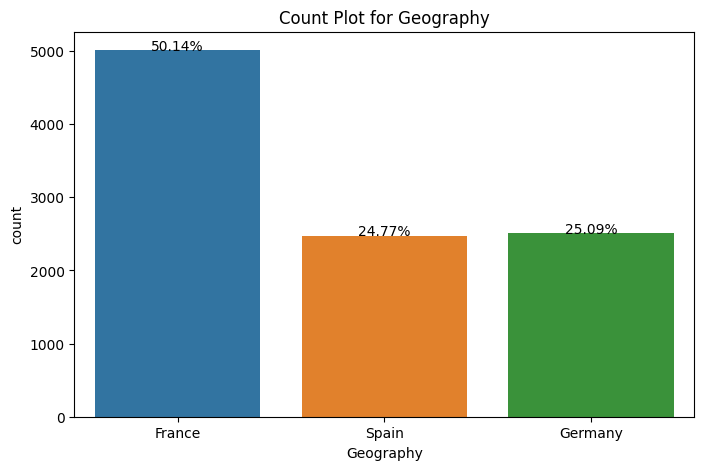

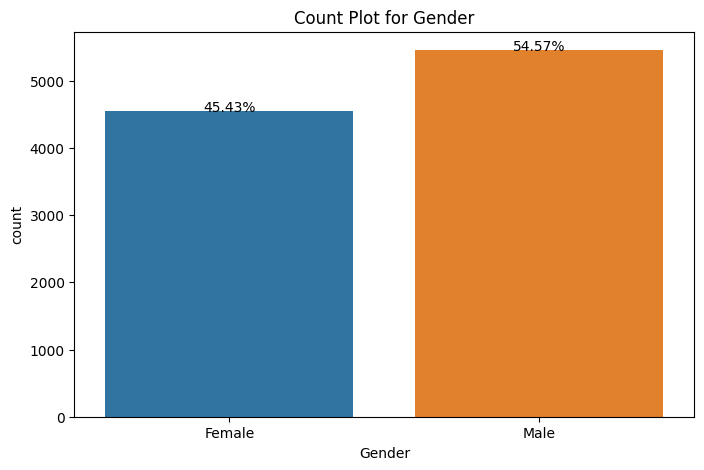

In [ ]:
# extracting only categorical variable from dataset to do UNIVARIATE Analysis
cat_var = ['Exited', 'IsActiveMember','HasCrCard','NumOfProducts','Tenure', 'Geography', 'Gender']
for col in cat_var:
  plt.figure(figsize=(8, 5))
  ax = sns.countplot(data=df, x=col)
  plt.title(f'Count Plot for {col}')
  total = float(len(df[col]))
  for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total:.2%}', ha="center")
  plt.show()

observations:
1. Only 20% of total have Exited.
2. Male are in large numbers than females
3. There are france citizens more than the other two countries.
4. A large number of people are from whoes tenure is 2 years.
5. Majority of the people are thoes who have bought at least 1 product.
6. Many people own a credit card.
7. Many are active memeber.

<ipython-input-13-78cb09c92163>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])  # Adjust the number of bins as needed


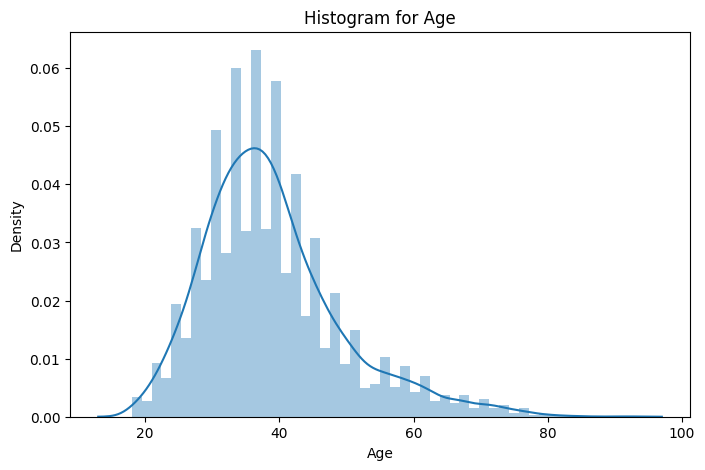

<ipython-input-13-78cb09c92163>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])  # Adjust the number of bins as needed


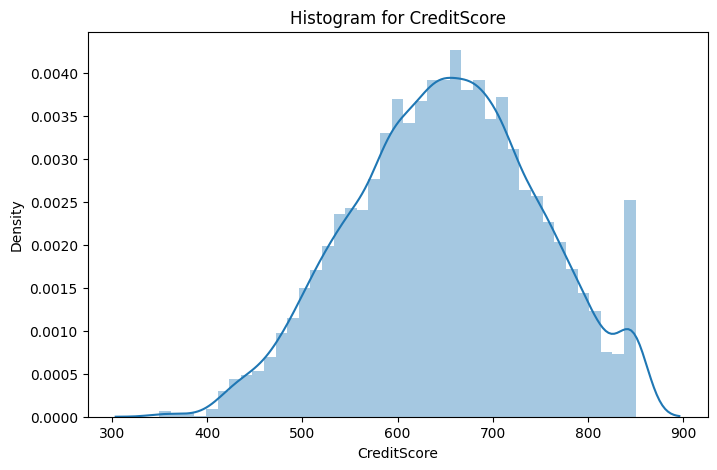

<ipython-input-13-78cb09c92163>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])  # Adjust the number of bins as needed


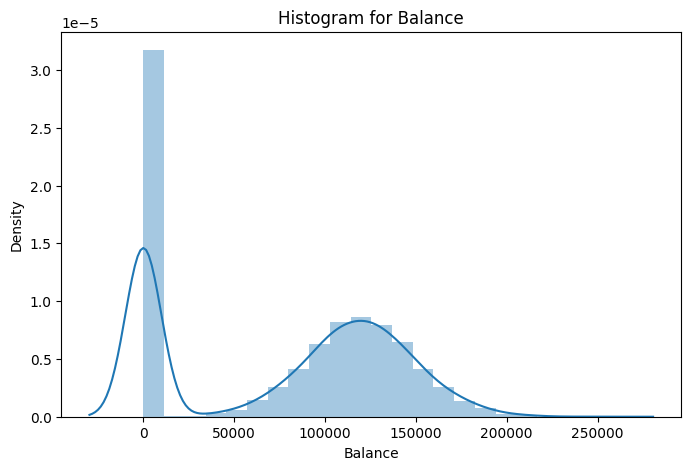

<ipython-input-13-78cb09c92163>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])  # Adjust the number of bins as needed


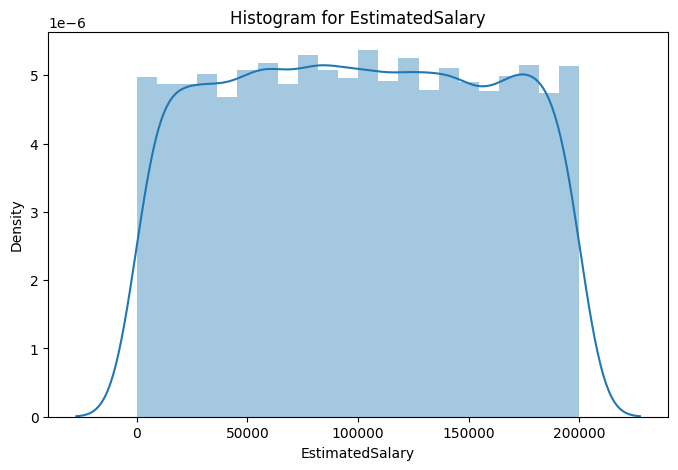

In [ ]:
# extracting numerical columns from dataframe to do UNIVARIATE Analysis
num_var = ['Age', 'CreditScore','Balance', 'EstimatedSalary']
for col in num_var:
    plt.figure(figsize=(8, 5))  # Set figure size to adjust layout
    sns.distplot(df[col])  # Adjust the number of bins as needed
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.show()

Observations:
1. The salary of all the customers is between 0 and 200000. And the most people lies between 45000 to 170000 salary range.
2. Most people have zero balance in their account.
3. Most people have a credit score between 600 to 700.
4. Most people come under age between 30 to 40 years old.

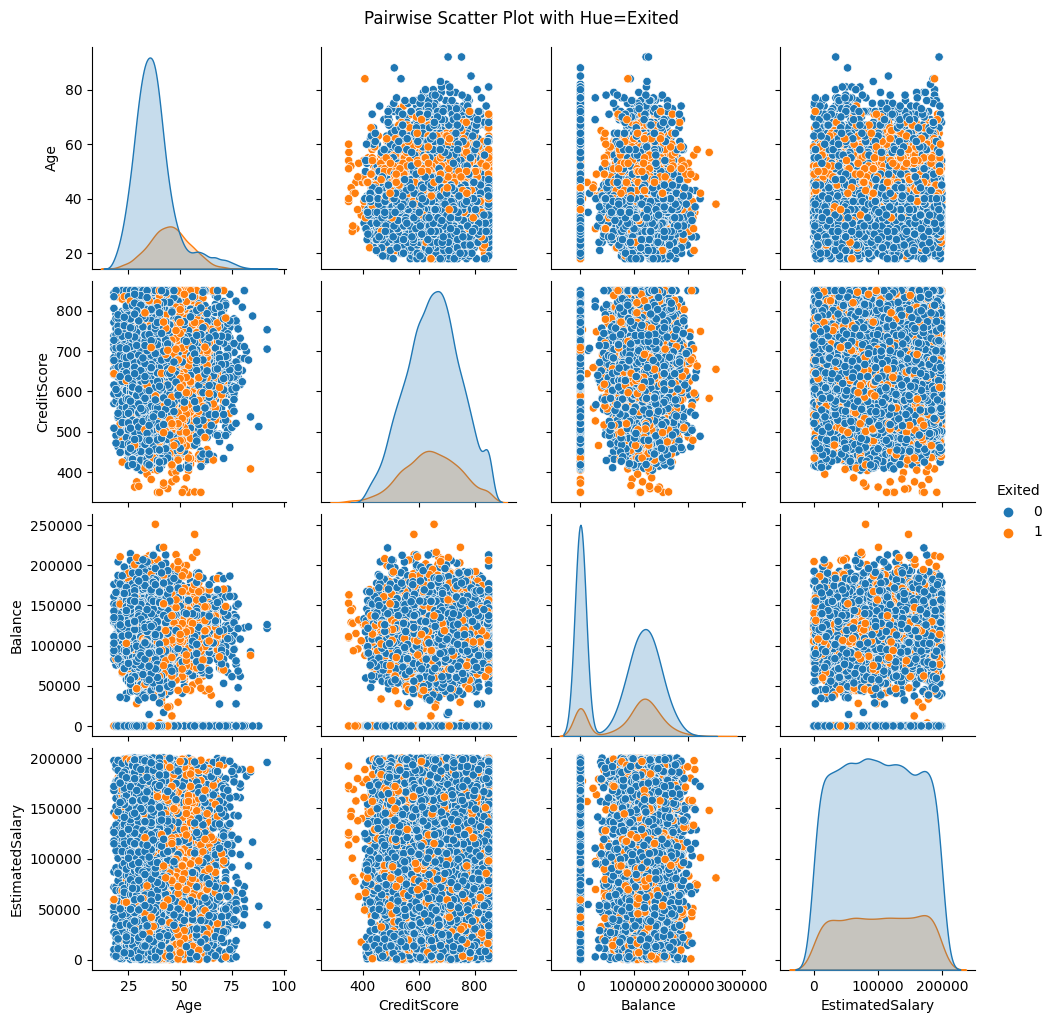

In [ ]:
# ploting pairplot using Seaborn library
sns.pairplot(df, vars=num_var, hue='Exited')
plt.suptitle('Pairwise Scatter Plot with Hue=Exited', y=1.02)
plt.show()

There is non-linear correlation between the numerical features and label.

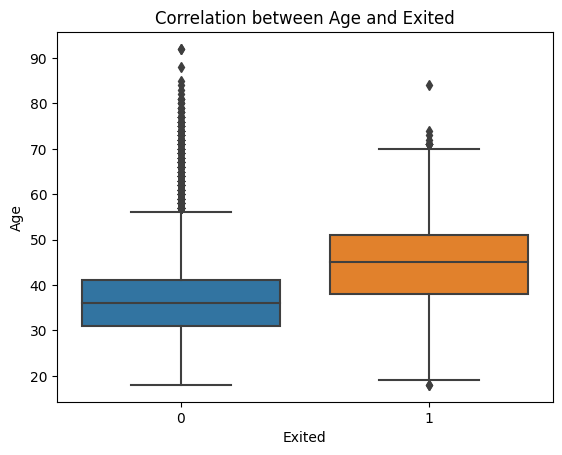

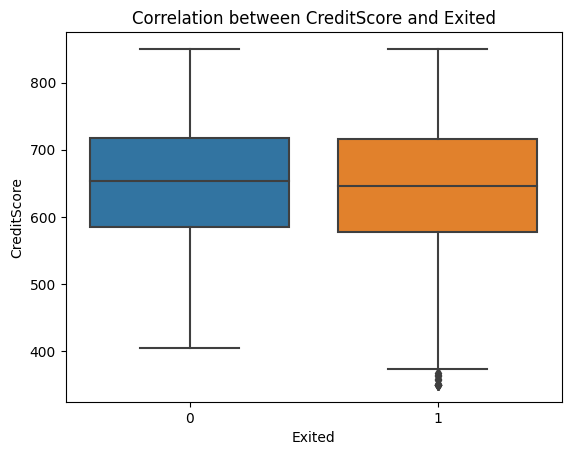

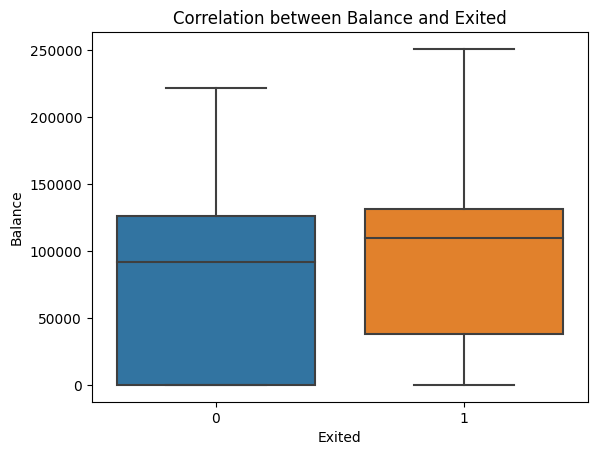

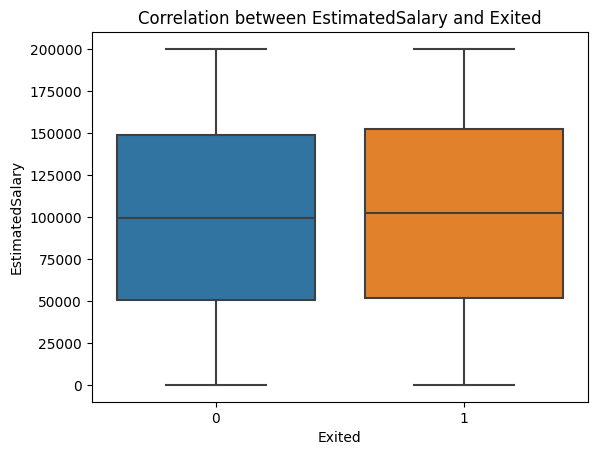

In [ ]:
# checking the correlation between numerical variable and Exited label using boxplot
for col in num_var:
  sns.boxplot(x='Exited', y=col, data=df)
  plt.title(f'Correlation between {col} and Exited')
  plt.show()

Observations:
1. If we talk about Salary column, there is no significant difference between Exited and Estimated salary.
2. If we talk about Balance , the customers who have exited had more balance in their account. It is a worrying situation for the bank because the bank could not lend money to customers in this situation.
3. The customers who have less credit score has exited. So, the bank need to look into this also.
4. The customers who have age more than 50 have exited the bank the reason must be the service provided by the bank to these customers and the service provided to the custoemrs of younger age.

<Axes: xlabel='Exited', ylabel='Gender'>

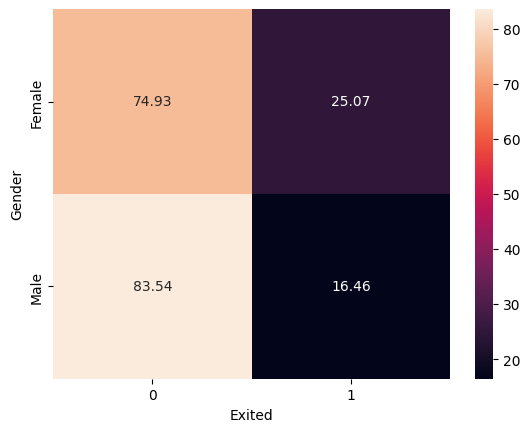

In [ ]:
# checking relationship between categorical variable--->[Gender, Geography] and categorical variable--->[Exited]
sns.heatmap((pd.crosstab(df['Gender'],df['Exited'], normalize='index')*100), fmt=".2f", annot=True)

Observations:
1. The percentage of Females is more as compared to Males with respect to Exited columns.
2. Less percentage of customers have exited the bank. Our goal is to retain the customers who have not yet exited.

<Axes: xlabel='Exited', ylabel='Geography'>

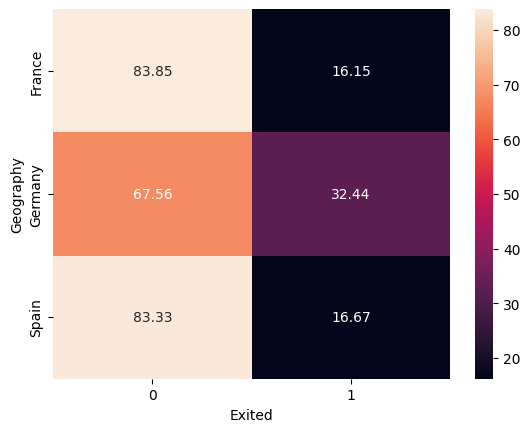

In [ ]:
sns.heatmap((pd.crosstab(df['Geography'],df['Exited'], normalize='index')*100), fmt=".2f", annot=True)

Observations:
1. Around 32 percentage of the custoemrs have exited the bank from Germany compared to other two countries, the reason may be services avaiability in that region.

## Outlier detection

In [ ]:
# chcking Mean, Standard Deviation, Min Value and Max value of CreditScore column for outlier detection using Z-score
print("Mean value of CreditScore",df['CreditScore'].mean())
print("Standard Deviation value of CreditScore",df['CreditScore'].std())
print("Min value of CreditScore",df['CreditScore'].min())
print("Max value of CreditScore",df['CreditScore'].max())

Mean value of CreditScore 650.5288
Standard Deviation value of CreditScore 96.65329873613035
Min value of CreditScore 350
Max value of CreditScore 850


In [ ]:
# finding the boundaries value using z-score formulae
print('Highest allowed', df['CreditScore'].mean()+ 3*df['CreditScore'].std())
print('Lowest allowed', df['CreditScore'].mean()- 3*df['CreditScore'].std())

Highest allowed 940.488696208391
Lowest allowed 360.568903791609


In [ ]:
# finding outliers from the creditscore column
df[(df['CreditScore']>940.488696208391) | (df['CreditScore']<360.568903791609)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,8724,15803202,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,8763,15765173,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,9625,15668309,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


In [ ]:
# importing numpy library
import numpy as np

# Replacing outliers of credit score column with highest and lowest boundry
df['CreditScore'] = np.where(df['CreditScore']>940, 850, np.where(df['CreditScore']<360, 360, df['CreditScore']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

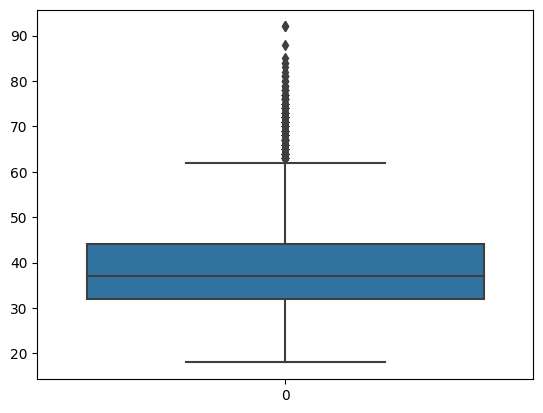

In [ ]:
# checking outlier in the Age column
sns.boxplot(df['Age'])

In [ ]:
# using IQR method to fing upper limit and lower limit
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)


Lower Limit: 14.0
Upper Limit: 62.0


In [ ]:
# finding outlier in the Age column
df[df['Age']>62]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


There are 359 rows considered as outlier using IQR Method, we will replace these with upper and lower limit boundries

In [ ]:
# Replacing outliers
df['Age'] = np.where(df['Age']>62, 62, np.where(df['Age']<14, 18, df['Age']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# dropping columns which is not relevent to our analysis
new_df = df.drop(['RowNumber',	'CustomerId',	'Surname'], axis=1)
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We have dropped the irrevent columns from the dataset We will take the above columns further for classification model training and testing.

## Model Building

In [ ]:
# creating x and y variable for train test split
X = new_df.drop(['Exited'], axis=1)
y = new_df[['Exited']]

In [ ]:
# importing train test plit from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700, 10), (3300, 10), (6700, 1), (3300, 1))

We have 6700 rows in traing set and 3300 rows in testing set.

**feature encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop = 'first', sparse=False)

In [ ]:
X_train_cat_cols = X_train[['Geography',	'Gender']]
X_train_num_cols = X_train.drop(['Geography',	'Gender', 'HasCrCard',	'IsActiveMember'], axis=1)

In [ ]:
X_test_cat_cols = X_test[['Geography',	'Gender']]
X_test_num_cols = X_test.drop(['Geography',	'Gender', 'HasCrCard',	'IsActiveMember'], axis=1)

In [ ]:
X_train_cat_cols_encoded = ohe.fit_transform(X_train_cat_cols)
X_train_cat_cols_encoded.reshape(6700, 3)
X_train_cat_cols_names_encoded = ohe.get_feature_names_out(X_train_cat_cols.columns)
X_train_cat_cols_encoded = pd.DataFrame(X_train_cat_cols_encoded, columns=X_train_cat_cols_names_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Encoded categorical columns with onehotncoder to fit in machine learning model for trainging and testing.

In [ ]:
X_test_cat_cols_encoded = ohe.transform(X_test_cat_cols)
X_test_cat_cols_encoded = pd.DataFrame(X_test_cat_cols_encoded, columns=X_train_cat_cols_names_encoded)

Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_num_cols_encoded = scaler.fit_transform(X_train_num_cols)
X_train_num_cols_encoded.reshape(6700, 6)
X_train_num_cols_names_encoded = scaler.get_feature_names_out(X_train_num_cols.columns)
X_train_num_cols_encoded = pd.DataFrame(X_train_num_cols_encoded, columns=X_train_num_cols_names_encoded)


In [ ]:
X_train_en = X_train[['HasCrCard',	'IsActiveMember'	]].values.reshape(6700, 2)

X_train_en = pd.DataFrame(X_train_en, columns=['HasCrCard',	'IsActiveMember'])

In [ ]:
X_train_encoded = pd.concat([X_train_num_cols_encoded, X_train_cat_cols_encoded, X_train_en], axis=1)
X_train_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
0,0.924490,0.250000,0.5,0.422719,0.000000,0.939995,1.0,0.0,0.0,0,0
1,0.655102,0.431818,0.8,0.291670,0.333333,0.126088,1.0,0.0,1.0,1,1
2,0.575510,0.704545,0.4,0.481026,0.000000,0.123474,1.0,0.0,1.0,1,0
3,0.514286,0.295455,0.8,0.470270,0.000000,0.270360,0.0,0.0,0.0,1,1
4,0.461224,0.340909,0.9,0.000000,0.000000,0.034445,0.0,0.0,1.0,1,0


Our traing dataset ready for fitting into the model.

In [ ]:
X_test_num_cols_encoded = scaler.fit_transform(X_test_num_cols)
X_test_num_cols_encoded.reshape(3300, 6)
X_test_num_cols_names_encoded = scaler.get_feature_names_out(X_test_num_cols.columns)
X_test_num_cols_encoded = pd.DataFrame(X_test_num_cols_encoded, columns=X_test_num_cols_names_encoded)

In [ ]:
X_test_en = X_test[['HasCrCard',	'IsActiveMember'	]].values.reshape(3300, 2)

X_test_en = pd.DataFrame(X_test_en, columns=['HasCrCard',	'IsActiveMember'])

In [ ]:
X_test_encoded = pd.concat([X_test_num_cols_encoded, X_test_cat_cols_encoded, X_test_en], axis=1)
X_test_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard,IsActiveMember
0,0.481633,0.318182,0.3,0.447500,0.333333,0.208904,1.0,0.0,1.0,0,0
1,0.536735,0.568182,0.1,0.000000,0.333333,0.731908,0.0,0.0,1.0,1,1
2,0.491837,0.590909,0.4,0.000000,0.333333,0.292777,0.0,1.0,0.0,1,0
3,0.297959,0.931818,0.8,0.551350,0.333333,0.853422,1.0,0.0,1.0,1,1
4,0.408163,0.204545,0.7,0.578391,0.000000,0.573346,0.0,1.0,0.0,1,1


Our testing dataset is ready to fit in the model

In [ ]:
#### MODEL TRAINING AND TESTING ####

# importing logistics regression
# importing GridSearchCV
# importing Performance matrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
classifier = LogisticRegression()
parameter = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[1,2,3,4,5,6,7,8,9, 10,20], 'max_iter':[100, 200, 300, 400, 500]}
clf = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)
clf.fit(X_train_encoded, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print('clf best parameters',clf.best_params_)
print('clf best scores',clf.best_score_)
y_pred = clf.predict(X_test_encoded)
score = accuracy_score(y_pred, y_test)
print('accuracy score' ,score)
print('classicfication report\n',classification_report(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

clf best parameters {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
clf best scores 0.8165671641791045
accuracy score 0.823939393939394
classicfication report
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      3024
           1       0.26      0.61      0.37       276

    accuracy                           0.82      3300
   macro avg       0.61      0.73      0.63      3300
weighted avg       0.90      0.82      0.85      3300

Confusion Matrix
 [[2550  107]
 [ 474  169]]


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
parameter = {'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best', 'random'],
             'max_depth':[1,2,3,4,5,6],
             'max_features':['aut', 'sqr', 'log2']
             }
dtc = GridSearchCV(tree, param_grid=parameter, scoring='accuracy', cv=5)
dtc.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['aut', 'sqr', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print('dtc best parameters',dtc.best_params_)
print('dtc best scores',dtc.best_score_)
y_pred = dtc.predict(X_test_encoded)
score = accuracy_score(y_pred, y_test)
print('accuracy score' ,score)
print('classicfication report\n',classification_report(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

dtc best parameters {'criterion': 'log_loss', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'best'}
dtc best scores 0.8414925373134328
accuracy score 0.8366666666666667
classicfication report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2688
           1       0.56      0.58      0.57       612

    accuracy                           0.84      3300
   macro avg       0.73      0.74      0.73      3300
weighted avg       0.84      0.84      0.84      3300

Confusion Matrix
 [[2403  254]
 [ 285  358]]


## Support Vector Classification

In [ ]:
from sklearn.svm import SVC
clf = SVC(probability=True)
parameter = {'C':[1,2,3,4,5,6,7,8,9,10],
             'kernel':['linear', 'rbf'],
             'degree':[2,4,6,8,1,7]
             }
svc = GridSearchCV(clf, param_grid=parameter, scoring='accuracy', cv=5)
svc.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'degree': [2, 4, 6, 8, 1, 7],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print('svc best parameters',svc.best_params_)
print('svc best scores',svc.best_score_)
y_pred = svc.predict(X_test_encoded)
score = accuracy_score(y_pred, y_test)
print('accuracy score' ,score)
print('classicfication report\n',classification_report(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

svc best parameters {'C': 8, 'degree': 2, 'kernel': 'rbf'}
svc best scores 0.8486567164179103
accuracy score 0.863030303030303
classicfication report
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      2977
           1       0.40      0.80      0.53       323

    accuracy                           0.86      3300
   macro avg       0.69      0.83      0.73      3300
weighted avg       0.92      0.86      0.88      3300

Confusion Matrix
 [[2591   66]
 [ 386  257]]


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)
y_pred = rf.predict(X_test_encoded)
score = accuracy_score(y_test, y_pred)
print('accuracy score' ,score)
print('classicfication report\n',classification_report(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

<ipython-input-49-a23e27adda09>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_encoded, y_train)


accuracy score 0.8672727272727273
classicfication report
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2885
           1       0.48      0.75      0.59       415

    accuracy                           0.87      3300
   macro avg       0.72      0.82      0.75      3300
weighted avg       0.90      0.87      0.88      3300

Confusion Matrix
 [[2552  105]
 [ 333  310]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go
import numpy as np

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=300,
    max_samples=0.75,
    random_state=42
)

In [ ]:
bag.fit(X_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.75,
                  n_estimators=300, random_state=42)

In [ ]:
y_pred = bag.predict(X_test_encoded)

In [ ]:
score = accuracy_score(y_test,y_pred)
print('accuracy score' ,score)
print('classicfication report\n',classification_report(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

accuracy score 0.8606060606060606
classicfication report
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      2865
           1       0.48      0.71      0.57       435

    accuracy                           0.86      3300
   macro avg       0.72      0.80      0.74      3300
weighted avg       0.89      0.86      0.87      3300

Confusion Matrix
 [[2531  126]
 [ 334  309]]


In [ ]:
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=300,
    max_samples=0.7,
    random_state=42
)

In [ ]:
bag.fit(X_train_encoded,y_train)
y_pred = bag.predict(X_test_encoded)
score = accuracy_score(y_test,y_pred)
print('accuracy score' ,score)
print('classicfication report\n',classification_report(y_pred,y_test))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



accuracy score 0.8466666666666667
classicfication report
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      3085
           1       0.27      0.82      0.41       215

    accuracy                           0.85      3300
   macro avg       0.63      0.83      0.66      3300
weighted avg       0.94      0.85      0.88      3300

Confusion Matrix
 [[2618   39]
 [ 467  176]]


Observation:
After taking all the relevent Machine Learning algorithams for this Churn Prediction (Classification) problem, we can say that Random Forest classifier is giving the best result with maximum accuracy.

## Plotting Roc Curve

In [ ]:
 #Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train_encoded, y_train)
lr_scores = classifier.predict_proba(X_test_encoded)[:,1]

# SVM model
svm_scores = svc.predict_proba(X_test_encoded)[:,1]

# Decision Tree Classifier
dtc_scores = dtc.predict_proba(X_test_encoded)[:,1]

# Random Forest Classifier
rf_scores = rf.predict_proba(X_test_encoded)[:,1]

# BaggingClassifier
bag_scores = bag.predict_proba(X_test_encoded)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate ROC curve data for Decision Tree Classifier
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_scores)
dtc_auc = roc_auc_score(y_test, dtc_scores)

# Generate ROC curve data for Random Forest Classifier
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_scores)
rf_auc = roc_auc_score(y_test, rf_scores)

# Generate ROC curve data for Bagging Classifier
bag_fpr, bag_tpr, bag_thresholds = roc_curve(y_test, bag_scores)
bag_auc = roc_auc_score(y_test, bag_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Generate a trace for the Decision Tree Classifier ROC curve
trace2 = go.Scatter(
    x=dtc_fpr,
    y=dtc_tpr,
    mode='lines',
    name=f'Decision Tree (Area = {dtc_auc:.2f})'
)

# Generate a trace for the Random Forest Classifier ROC curve
trace3 = go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'Random Forest (Area = {rf_auc:.2f})'
)

# Generate a trace for the Bagging Classifier ROC curve
trace4 = go.Scatter(
    x=bag_fpr,
    y=bag_tpr,
    mode='lines',
    name=f'Bagging Classifier (Area = {bag_auc:.2f})'
)

# Diagonal line
trace5 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Findings and Conclusion:
Factors contribute to customer churn are Age, CreditScore, Balance, Greography and Gender. If we talk about Age, the customers who are older than 50 years of age are churning more than the younger age, the reson may be the services offered to them. The other factors which I mentained earlier is CreditScore, the reason may be the low credit score of the customers and Balance in customers accounts, the reason may be the low credit score of the customers and the customer who have high bank balance they are leaving more. There are also some factors like Gender and Geography where customers have exited the bank like if we talk about Geography, in our analysis we have found that the customers who belong to Germany have exited more compared to other two regions, and the reson for this may be the services that are offered are not sufficient. The second factor i.e. Gender, Females have more churn rate than Males the reason is same i.e. better sevices and facilities are not better for them.

It is recommanded to the bank that they should look into the factors that are contributing to the churn rate and take some actions. We have also build a machine learning classification model that can predict which customer is going to churn in the future with an accuracy of 87% and the bank can make their strategy accordingly to retain the customers.